In [72]:
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='browser'
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [112]:
data = pd.read_csv('../Curated_data/cluster_0_data.csv', low_memory=False)

In [113]:
density_data = pd.read_csv("../Curated_data/density_predictors.csv", low_memory=False)
density_data2 = density_data.drop(columns = 'Name')

In [114]:
density_data[['Sulph1_Code', 'Sulph1_Pct', 'Sulph2_Code', 'Sulph2_Pct']] = data[['Sulph1_Code', 'Sulph1_Pct', 'Sulph2_Code', 'Sulph2_Pct']]

In [115]:
variable = 'Density_gcm3'
covariates = ['Sulph1_Code', 'Sulph1_Pct', 'Sulph2_Code', 'Sulph2_Pct']
#covariates = ['Sulph1_Code', 'Sulph1_Pct']


#Select columns of interest
selected_columns = ["Name", 'X', 'Y', 'Z', variable] + covariates
density_data2 = density_data[selected_columns]

#Drop NA's and filter for the chosen hole
#density_data2 = density_data.dropna(subset=[variable] + covariates)

In [122]:
density_data2 = density_data

In [127]:
density_data2 = density_data2.drop(columns = ['Sulph1_Code', 'Sulph1_Pct', 'Sulph2_Code', 'Sulph2_Pct','Name'])

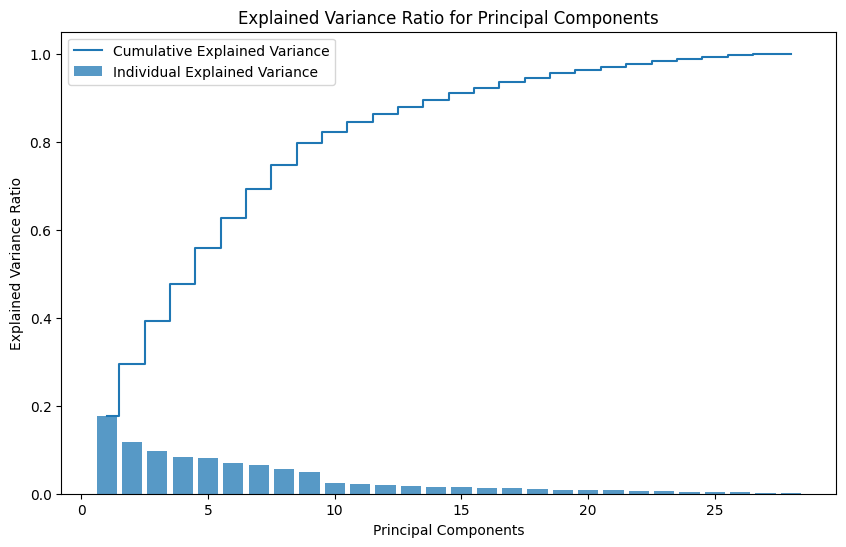

In [139]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
variables_of_interest = 'Density_gcm3'
# Extract features (excluding the variables to keep)
features = density_data2.drop(columns=variables_of_interest)

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

#Fill NAs
features_filled = np.nan_to_num(features_standardized, nan=0)


# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(features_filled)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, len(features.columns)+1)])

# Plot the explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_explained_var = explained_var_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio, alpha=0.75, align='center', label='Individual Explained Variance')
plt.step(range(1, len(explained_var_ratio) + 1), cumulative_explained_var, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.legend()
plt.show()


In [140]:
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,-0.329300,1.795201,0.276726,-1.164116,-0.314526,-0.487002,0.381307,-0.136335,-1.546521,-0.063299,...,-0.025121,0.072436,-0.006946,-0.023508,-0.005448,-0.016080,-0.008923,0.039273,0.029771,-0.013517
1,-0.326257,1.793601,0.272510,-1.163670,-0.307699,-0.486135,0.380414,-0.132643,-1.545649,-0.062726,...,-0.024899,0.072223,-0.007032,-0.023489,-0.005401,-0.016002,-0.008850,0.039214,0.029774,-0.013470
2,-0.323213,1.792001,0.268293,-1.163224,-0.300872,-0.485268,0.379522,-0.128951,-1.544777,-0.062153,...,-0.024678,0.072011,-0.007119,-0.023471,-0.005355,-0.015925,-0.008777,0.039155,0.029778,-0.013423
3,-0.320170,1.790401,0.264076,-1.162778,-0.294045,-0.484401,0.378630,-0.125259,-1.543904,-0.061581,...,-0.024457,0.071799,-0.007206,-0.023452,-0.005308,-0.015847,-0.008704,0.039097,0.029781,-0.013377
4,-0.317113,1.788787,0.259845,-1.162316,-0.287180,-0.483525,0.377743,-0.121541,-1.543034,-0.061005,...,-0.024235,0.071586,-0.007293,-0.023434,-0.005261,-0.015769,-0.008630,0.039038,0.029784,-0.013329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81197,0.163959,1.991675,-0.142033,-1.340534,0.373323,-0.512734,0.372934,0.308164,-1.851806,-0.023672,...,-0.004960,0.065894,-0.021579,-0.026687,-0.001985,-0.010145,-0.001051,0.044245,0.039253,-0.011229
81198,0.166919,1.990270,-0.146290,-1.340454,0.379768,-0.511995,0.371720,0.311474,-1.850689,-0.023114,...,-0.004727,0.065696,-0.021660,-0.026661,-0.001941,-0.010078,-0.000976,0.044180,0.039256,-0.011181
81199,0.169888,1.988871,-0.150562,-1.340389,0.386220,-0.511260,0.370490,0.314779,-1.849563,-0.022554,...,-0.004493,0.065498,-0.021743,-0.026634,-0.001898,-0.010011,-0.000902,0.044115,0.039258,-0.011133
81200,0.172849,1.987467,-0.154819,-1.340309,0.392665,-0.510520,0.369275,0.318089,-1.848446,-0.021995,...,-0.004260,0.065299,-0.021825,-0.026608,-0.001855,-0.009944,-0.000827,0.044050,0.039261,-0.011085


In [141]:
pc_df[['Density_gcm3','Sulph1_Code', 'Sulph1_Pct', 'Sulph2_Code', 'Sulph2_Pct']] = data[['Density_gcm3','Sulph1_Code', 'Sulph1_Pct', 'Sulph2_Code', 'Sulph2_Pct']]


In [142]:
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC24,PC25,PC26,PC27,PC28,Density_gcm3,Sulph1_Code,Sulph1_Pct,Sulph2_Code,Sulph2_Pct
0,-0.329300,1.795201,0.276726,-1.164116,-0.314526,-0.487002,0.381307,-0.136335,-1.546521,-0.063299,...,-0.016080,-0.008923,0.039273,0.029771,-0.013517,NaN,NaN,NaN,NaN,NaN
1,-0.326257,1.793601,0.272510,-1.163670,-0.307699,-0.486135,0.380414,-0.132643,-1.545649,-0.062726,...,-0.016002,-0.008850,0.039214,0.029774,-0.013470,NaN,NaN,NaN,NaN,NaN
2,-0.323213,1.792001,0.268293,-1.163224,-0.300872,-0.485268,0.379522,-0.128951,-1.544777,-0.062153,...,-0.015925,-0.008777,0.039155,0.029778,-0.013423,NaN,NaN,NaN,NaN,NaN
3,-0.320170,1.790401,0.264076,-1.162778,-0.294045,-0.484401,0.378630,-0.125259,-1.543904,-0.061581,...,-0.015847,-0.008704,0.039097,0.029781,-0.013377,NaN,NaN,NaN,NaN,NaN
4,-0.317113,1.788787,0.259845,-1.162316,-0.287180,-0.483525,0.377743,-0.121541,-1.543034,-0.061005,...,-0.015769,-0.008630,0.039038,0.029784,-0.013329,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81197,0.163959,1.991675,-0.142033,-1.340534,0.373323,-0.512734,0.372934,0.308164,-1.851806,-0.023672,...,-0.010145,-0.001051,0.044245,0.039253,-0.011229,NaN,NaN,NaN,NaN,NaN
81198,0.166919,1.990270,-0.146290,-1.340454,0.379768,-0.511995,0.371720,0.311474,-1.850689,-0.023114,...,-0.010078,-0.000976,0.044180,0.039256,-0.011181,NaN,NaN,NaN,NaN,NaN
81199,0.169888,1.988871,-0.150562,-1.340389,0.386220,-0.511260,0.370490,0.314779,-1.849563,-0.022554,...,-0.010011,-0.000902,0.044115,0.039258,-0.011133,NaN,NaN,NaN,NaN,NaN
81200,0.172849,1.987467,-0.154819,-1.340309,0.392665,-0.510520,0.369275,0.318089,-1.848446,-0.021995,...,-0.009944,-0.000827,0.044050,0.039261,-0.011085,NaN,NaN,NaN,NaN,NaN


In [143]:
variable = 'Density_gcm3'
covariates = ['Sulph1_Code', 'Sulph1_Pct', 'Sulph2_Code', 'Sulph2_Pct']
#covariates = ['Sulph1_Code', 'Sulph1_Pct']


#Select columns of interest
selected_columns = [variable] + covariates


#Drop NA's and filter for the chosen hole
pc_df = pc_df.dropna(subset=[variable] + covariates)

In [144]:
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC24,PC25,PC26,PC27,PC28,Density_gcm3,Sulph1_Code,Sulph1_Pct,Sulph2_Code,Sulph2_Pct
393,1.991378,-0.309057,0.947410,-0.534431,-0.742550,-1.373361,0.538584,-0.475464,-0.334043,-0.196615,...,-0.275715,-0.023458,0.035371,0.004758,-0.012648,3.13,PO,1.0,CP,1.0
394,1.999390,-0.270746,1.018037,-0.487770,-0.694920,-1.296253,0.419887,-0.491527,-0.362377,-0.200983,...,-0.274726,-0.018838,0.030466,0.007026,-0.010730,3.15,PO,1.0,CP,1.0
434,2.160101,-0.502085,0.648394,-0.401570,-0.366865,-1.251951,0.637349,-0.662339,-0.481948,0.193059,...,-0.267449,-0.018579,0.030580,0.005230,-0.009829,3.22,PO,1.0,CP,1.0
435,2.159707,-0.528731,0.664540,-0.357356,-0.342170,-1.214533,0.599509,-0.650581,-0.502803,0.144712,...,-0.282903,-0.028973,0.020589,-0.002253,-0.010839,3.22,PO,2.0,CP,1.5
436,2.154779,-0.576497,0.717851,-0.284784,-0.296535,-1.185393,0.544477,-0.662047,-0.485753,0.148347,...,-0.300147,-0.051083,0.020253,-0.001512,-0.011456,3.22,PO,3.0,CP,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81071,5.528110,6.476147,1.043268,-1.162846,1.043066,0.412337,5.663429,-1.666944,4.128962,-1.374809,...,0.935290,-1.721593,-0.470914,-0.393741,0.402491,3.44,PO,3.0,CP,0.2
81072,5.328182,6.012665,1.028646,-1.117901,0.997536,0.258943,4.944498,-1.496042,3.345850,-1.119403,...,0.830994,-0.373314,-0.848785,-0.491368,-0.196081,3.43,PO,3.0,CP,0.2
81073,5.366455,6.220966,1.153308,-1.118373,1.008822,0.306748,5.048516,-1.318528,3.627895,-1.392071,...,0.818478,-0.263861,-0.581444,-0.534576,-0.104278,3.44,PO,3.0,CP,0.2
81074,5.409629,6.326984,1.140109,-1.146239,1.027478,0.299519,5.271380,-1.344053,3.882263,-1.603621,...,0.848179,-0.391258,-0.592713,-0.499746,-0.047479,3.40,PO,3.0,CP,0.2


In [173]:
covariates = pc_df.iloc[:, :-2].columns
covariates = covariates[:3]
deposit_data = pc_df

In [174]:
covariates = covariates.tolist()

# Display the list
print(covariates)

['PC1', 'PC2', 'PC3']


In [175]:
np.random.seed(42)
torch.manual_seed(42)


x = deposit_data[covariates].values  # Use X, Y, and Z coordinates
y = deposit_data[mineral].values[:, np.newaxis]  # Keep mineral as the output
x = x.reshape(len(deposit_data), len(covariates))

x = torch.tensor(x)
y = torch.tensor(y)
x = x.to(torch.float32)
y = y.to(torch.float32)

In [176]:
deposit_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC24,PC25,PC26,PC27,PC28,Density_gcm3,Sulph1_Code,Sulph1_Pct,Sulph2_Code,Sulph2_Pct
393,1.991378,-0.309057,0.947410,-0.534431,-0.742550,-1.373361,0.538584,-0.475464,-0.334043,-0.196615,...,-0.275715,-0.023458,0.035371,0.004758,-0.012648,3.13,PO,1.0,CP,1.0
394,1.999390,-0.270746,1.018037,-0.487770,-0.694920,-1.296253,0.419887,-0.491527,-0.362377,-0.200983,...,-0.274726,-0.018838,0.030466,0.007026,-0.010730,3.15,PO,1.0,CP,1.0
434,2.160101,-0.502085,0.648394,-0.401570,-0.366865,-1.251951,0.637349,-0.662339,-0.481948,0.193059,...,-0.267449,-0.018579,0.030580,0.005230,-0.009829,3.22,PO,1.0,CP,1.0
435,2.159707,-0.528731,0.664540,-0.357356,-0.342170,-1.214533,0.599509,-0.650581,-0.502803,0.144712,...,-0.282903,-0.028973,0.020589,-0.002253,-0.010839,3.22,PO,2.0,CP,1.5
436,2.154779,-0.576497,0.717851,-0.284784,-0.296535,-1.185393,0.544477,-0.662047,-0.485753,0.148347,...,-0.300147,-0.051083,0.020253,-0.001512,-0.011456,3.22,PO,3.0,CP,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81071,5.528110,6.476147,1.043268,-1.162846,1.043066,0.412337,5.663429,-1.666944,4.128962,-1.374809,...,0.935290,-1.721593,-0.470914,-0.393741,0.402491,3.44,PO,3.0,CP,0.2
81072,5.328182,6.012665,1.028646,-1.117901,0.997536,0.258943,4.944498,-1.496042,3.345850,-1.119403,...,0.830994,-0.373314,-0.848785,-0.491368,-0.196081,3.43,PO,3.0,CP,0.2
81073,5.366455,6.220966,1.153308,-1.118373,1.008822,0.306748,5.048516,-1.318528,3.627895,-1.392071,...,0.818478,-0.263861,-0.581444,-0.534576,-0.104278,3.44,PO,3.0,CP,0.2
81074,5.409629,6.326984,1.140109,-1.146239,1.027478,0.299519,5.271380,-1.344053,3.882263,-1.603621,...,0.848179,-0.391258,-0.592713,-0.499746,-0.047479,3.40,PO,3.0,CP,0.2


In [177]:
# Function to print evaluation metrics
def print_metrics(actual, predicted, set_name):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f"Metrics for {set_name} set:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R^2: {r2:.4f}\n")


Metrics for Fold 1:
Metrics for Test set:
  MSE: 0.0750
  RMSE: 0.2739
  MAE: 0.1853
  R^2: 0.0019



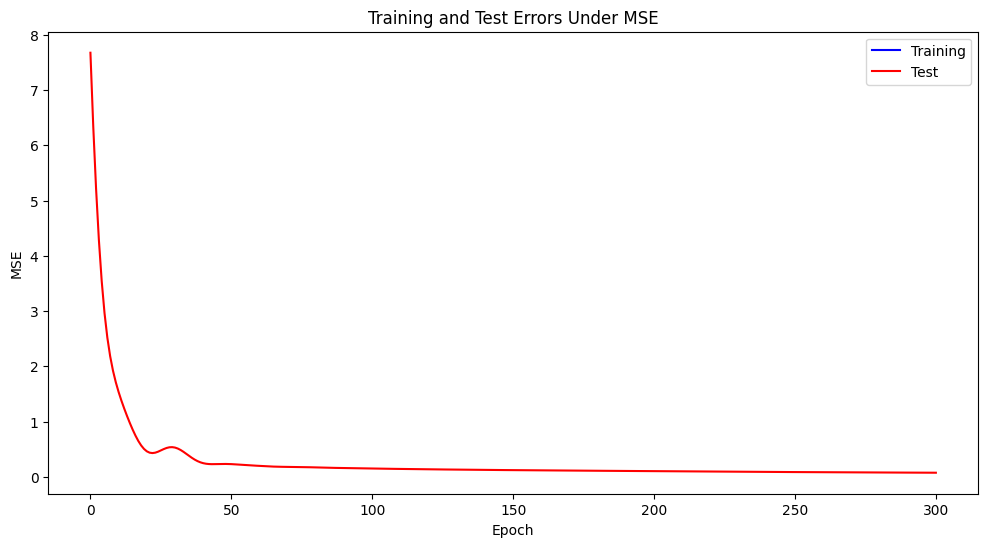


Metrics for Fold 2:
Metrics for Test set:
  MSE: 0.0558
  RMSE: 0.2363
  MAE: 0.1516
  R^2: 0.0954



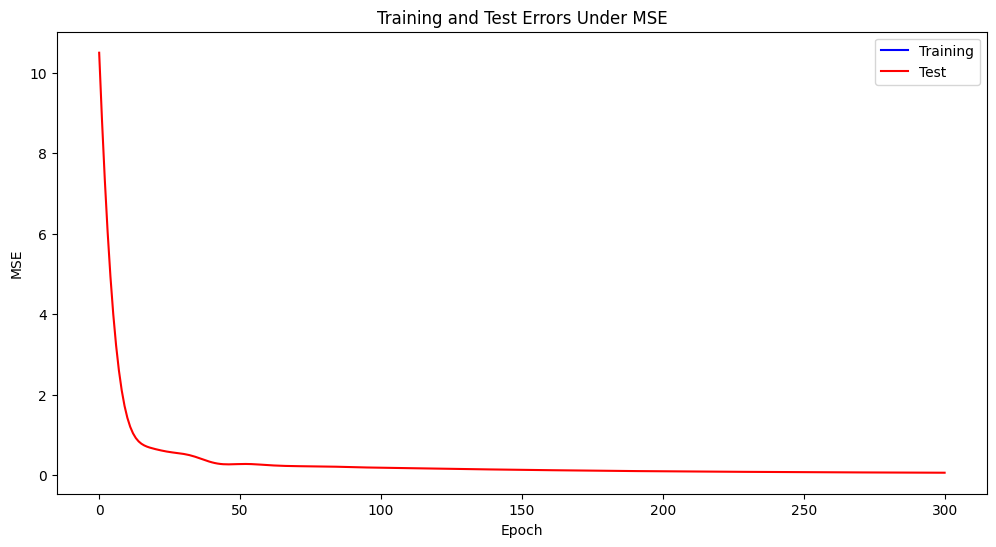


Metrics for Fold 3:
Metrics for Test set:
  MSE: 0.0728
  RMSE: 0.2698
  MAE: 0.1684
  R^2: -0.0486



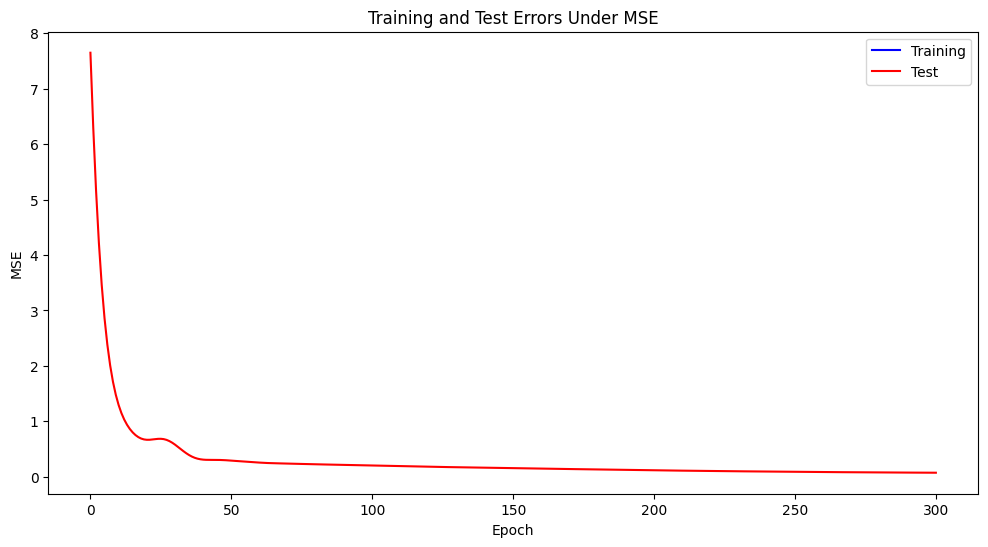


Metrics for Fold 4:
Metrics for Test set:
  MSE: 0.0645
  RMSE: 0.2540
  MAE: 0.1710
  R^2: -0.0151



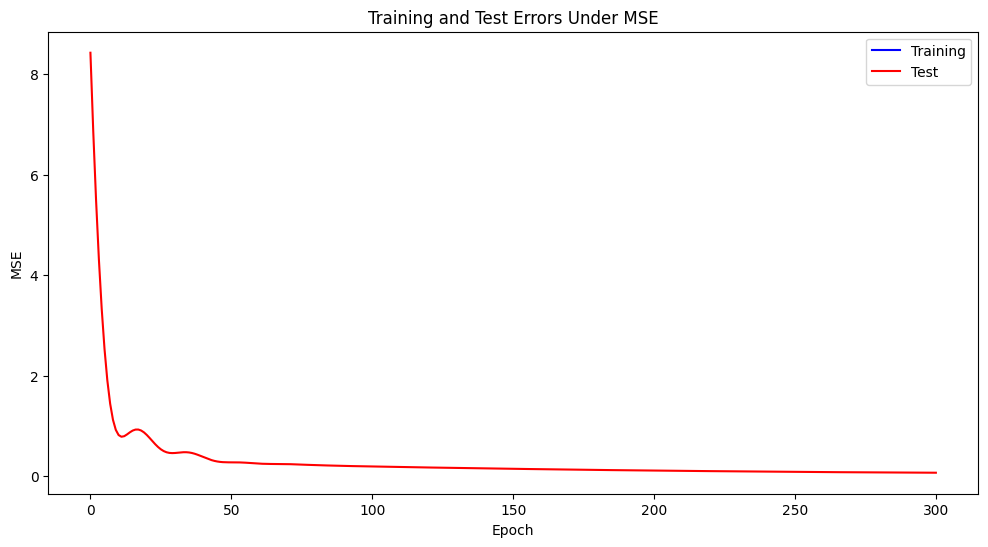


Metrics for Fold 5:
Metrics for Test set:
  MSE: 0.0925
  RMSE: 0.3042
  MAE: 0.1964
  R^2: -0.0925



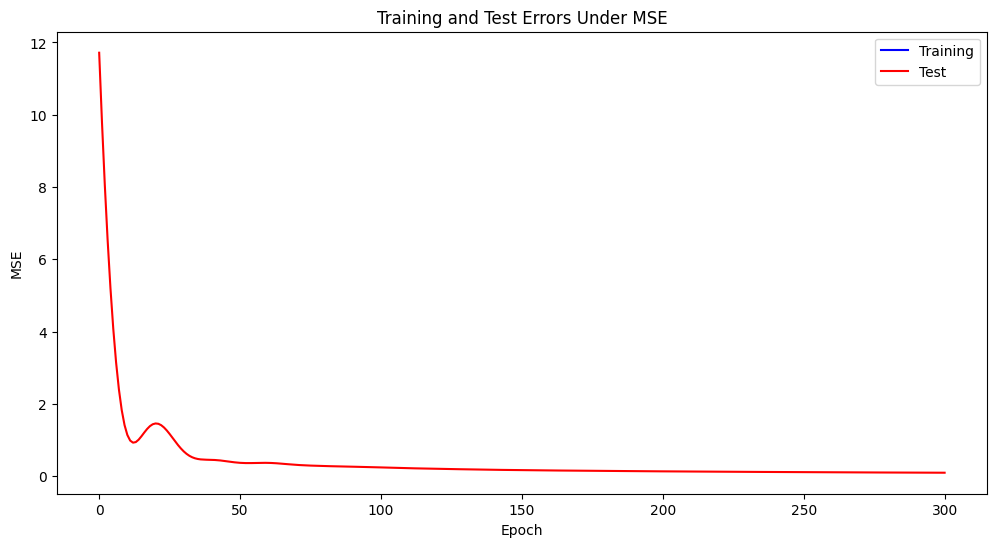


Metrics for Fold 6:
Metrics for Test set:
  MSE: 0.0837
  RMSE: 0.2894
  MAE: 0.1997
  R^2: -0.3976



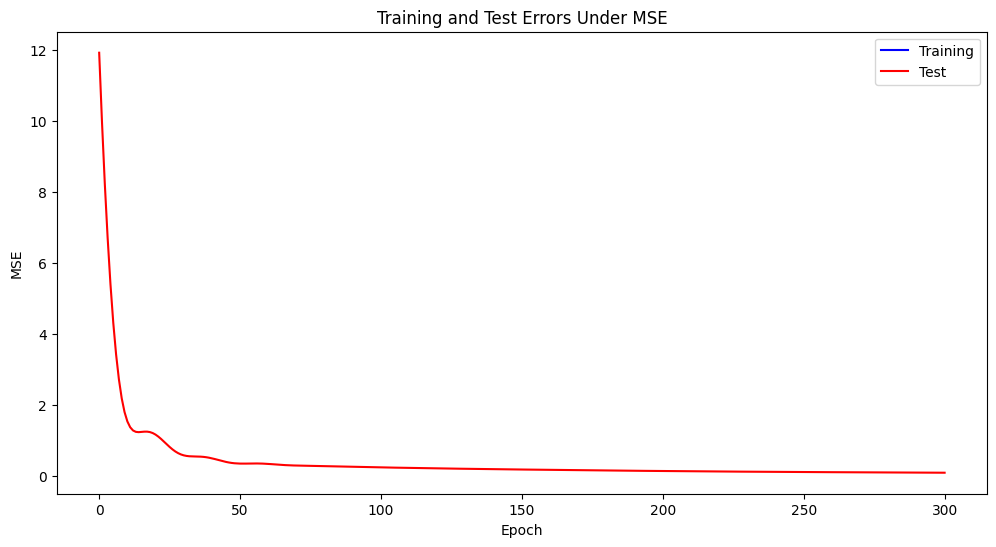


Metrics for Fold 7:
Metrics for Test set:
  MSE: 0.0899
  RMSE: 0.2998
  MAE: 0.1952
  R^2: -0.0577



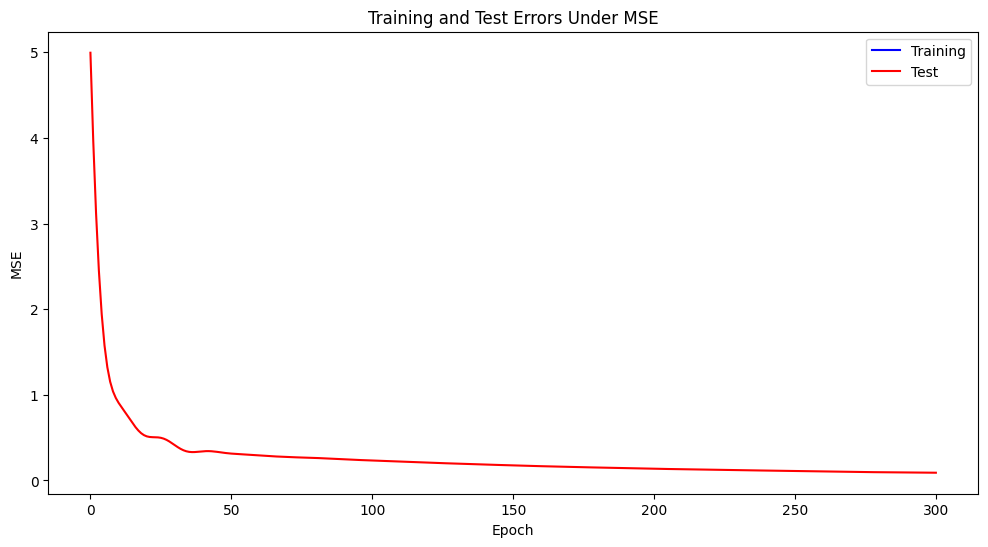


Metrics for Fold 8:
Metrics for Test set:
  MSE: 0.0942
  RMSE: 0.3069
  MAE: 0.2062
  R^2: -0.1105



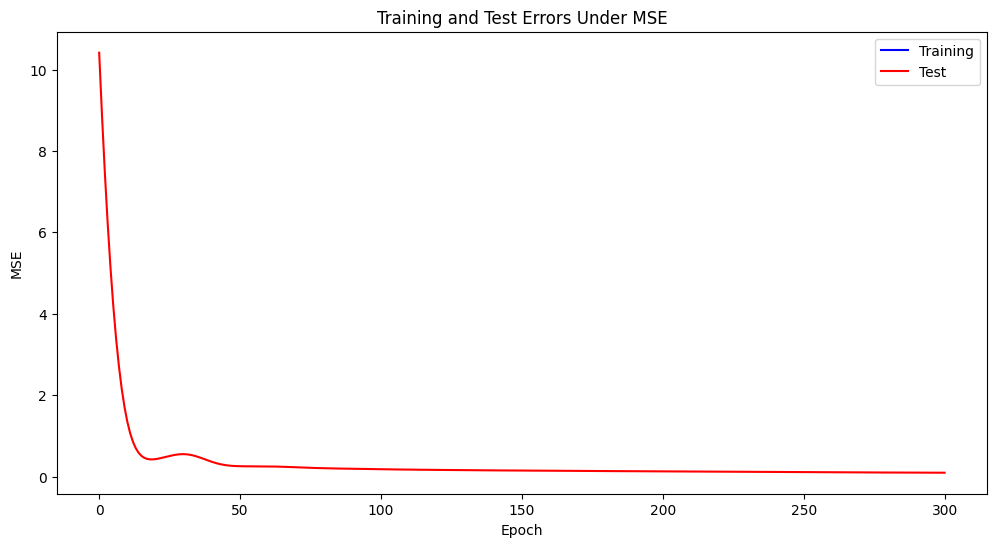


Metrics for Fold 9:
Metrics for Test set:
  MSE: 0.0529
  RMSE: 0.2301
  MAE: 0.1532
  R^2: 0.1132



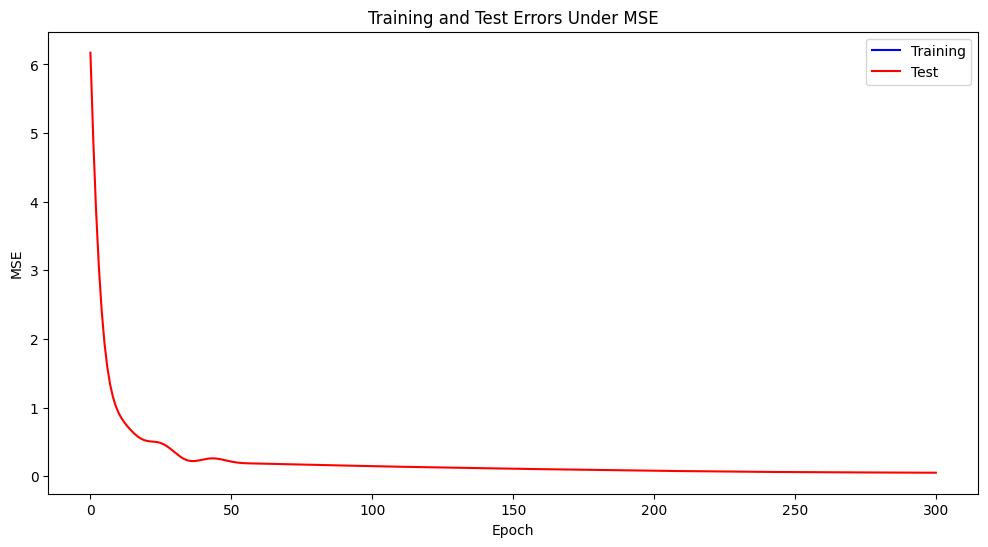


Metrics for Fold 10:
Metrics for Test set:
  MSE: 0.0874
  RMSE: 0.2956
  MAE: 0.1906
  R^2: 0.0570



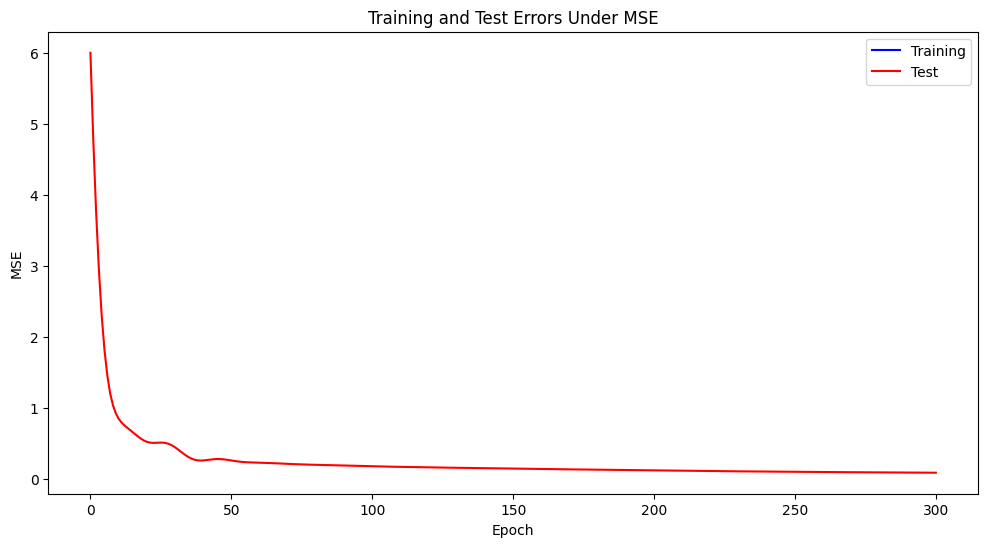


Average Metrics Across Folds:
  Average MSE: 0.0769
  Average RMSE: 0.2760
  Average MAE: 0.1818
  Average R^2: -0.0455


In [178]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

torch.manual_seed(42)
np.random.seed(42)

# Assuming deposit_data, covariates, and other necessary variables are defined

# Create an array to store metrics for each fold
test_mse_list = []
test_rmse_list = []
test_mae_list = []
test_r2_list = []

# Define the number of folds for cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(deposit_data)):
    train_data, test_data = deposit_data.iloc[train_index], deposit_data.iloc[test_index]

    x_train = train_data[covariates].values
    y_train = train_data['Density_gcm3'].values

    x_test = test_data[covariates].values
    y_test = test_data['Density_gcm3'].values

    # Define your neural network
    model = nn.Sequential(
        nn.Linear(in_features=len(covariates), out_features=500),
        nn.ReLU(),
        nn.Linear(in_features=500, out_features=1)
    )

    mse_loss = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []  # To store training losses during training
    test_losses = []   # To store test losses during training

    # Training loop
    for step in range(301):
        pre = model(torch.tensor(x_train, dtype=torch.float32))
        mse = mse_loss(pre, torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32))
        cost = mse

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        pre_test = model(torch.tensor(x_test, dtype=torch.float32))
        mse_test = mse_loss(pre_test, torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32))
        test_losses.append(mse_test.item())
        

    # Store metrics for this fold
    test_predictions_fold = model(torch.tensor(x_test, dtype=torch.float32)).detach().numpy().flatten()
    test_mse_list.append(mean_squared_error(y_test, test_predictions_fold))
    test_rmse_list.append(np.sqrt(test_mse_list[-1]))
    test_mae_list.append(mean_absolute_error(y_test, test_predictions_fold))
    test_r2_list.append(r2_score(y_test, test_predictions_fold))

    # Print metrics for the current fold
    print(f"\nMetrics for Fold {fold + 1}:")
    print_metrics(y_test, test_predictions_fold, "Test")

        # Create a plot showing only values under 0.2 on the y-axis
    plt.figure(figsize=(12, 6))
    plt.plot(train_losses, label='Training', color='blue')
    plt.plot(test_losses, label='Test', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    #plt.ylim(0, 1)  # Set the y-axis limit to filter values under 0.05
    plt.legend()
    plt.title('Training and Test Errors Under MSE')
    plt.show()




# Print average metrics across folds
print("\nAverage Metrics Across Folds:")
print(f"  Average MSE: {np.mean(test_mse_list):.4f}")
print(f"  Average RMSE: {np.mean(test_rmse_list):.4f}")
print(f"  Average MAE: {np.mean(test_mae_list):.4f}")
print(f"  Average R^2: {np.mean(test_r2_list):.4f}")


In [152]:
len(x)

2618